# **Unmasking Misinformation using NLP Techniques** (LIAR Dataset)

Submitted by

> 1. Chiradeep Nanabala	821497551
> 2. Srivatsa Srinivas Rusum 468405627
> 3. Nikhil Varma Pratap	415014766
> 4. Indraneel Somayajula	879828543


Under Prof. Lu Xiao






# **Content:**

1. Data Pre-processing
2. Feature Extraction
> TF-IDF, Glove, Word2Vec
3. BERT
4. Machine Learning Algorithms
> Naive Bayes, Logistic Regression, Support Vector Machine, Decision Tree, Random Forest
5. Deep Learning Algorithms
> CNN, LSTM, GRU
6. Model Evaluation
7. Comparison of Metrics
8. Results
9. Conclusion

# **Abstract:**

The spread of misinformation and disinformation has become a growing concern in our digital age. In this project, we explore the use of Natural Language Processing (NLP) techniques to detect and unmask information pollution using the LIAR dataset.


The task of detecting fake news is challenging and requires the use of different approaches such as machine learning and deep learning models. In this case, the liar dataset was used along with four different word embeddings (Tf-idf, glove, word2vec, and BERT) to train several machine learning models (Naive bayes, logistic regression, random forest, svm, and decision trees) and deep learning models (CNN, LSTM, and GRU). The results show that different embeddings and models led to different accuracy scores, indicating the importance of selecting the appropriate combination of embedding and model for fake news detection. Overall, it is essential to carefully consider the choice of model and embedding to achieve better performance in detecting fake news.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate, Dropout, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import json
import csv
import nltk

from google.colab import drive
drive.mount('/drive')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Mounted at /drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

The below first line of code reads the train.tsv file from your Google Drive and saves it as a Pandas dataframe named train. The second line reads the test.tsv file and saves it as a dataframe named test, and the third line reads the valid.tsv file and saves it as a dataframe named valid.
Each of these dataframes has 14 columns, which are labeled according to the code you provided. These columns correspond to the fields in the Liar dataset, which is a publicly available dataset of political statements and their truthfulness labels.


The column names are as follows:

1. id: Unique identifier for each statement
2.	label: Truthfulness label for the statement (e.g., "pants-fire", "false", "barely-true", "half-true", "mostly-true", or "true")
3.	statement: The text of the statement
4.	subject: The subject of the statement
5. speaker: The name of the speaker who made the statement
6.	speaker_job: The job or title of the speaker
7.	state: The state that the speaker is from (if applicable)
8. party_affiliation: The political party affiliation of the speaker (if applicable)
9.	barely_true: The number of times the statement was judged as "barely true"
10.	false: The number of times the statement was judged as "false"
11.	half_true: The number of times the statement was judged as "half true"
12.	mostly_true: The number of times the statement was judged as "mostly true"
13.	pants_on_fire: The number of times the statement was judged as "pants on fire" (i.e., a blatant lie)
14.	context: The context or setting in which the statement was made


In [ ]:
# Loading the LIAR dataset
train = pd.read_csv('/drive/My Drive/NLP_PROJECT/liar_dataset/train.tsv', sep='\t', header=None)
test = pd.read_csv('/drive/My Drive/NLP_PROJECT/liar_dataset/test.tsv', sep='\t', header=None)
valid = pd.read_csv('/drive/My Drive/NLP_PROJECT/liar_dataset/valid.tsv', sep='\t', header=None)

# Define column names for the dataset
train.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state', 'party_affiliation', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']
test.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state', 'party_affiliation', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']
valid.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state', 'party_affiliation', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']

Class_Distr that creates a count plot of the distribution of labels in a given dataframe. The function takes a single argument datafile, which is the name of the dataframe to analyze.

The sns.countplot() function is used to create the count plot. It takes two arguments: x, which specifies the column to plot on the x-axis (in this case, the label column), and data, which specifies the dataframe to use for the plot. The palette argument specifies the color palette to use for the plot.
This is a useful way to visualize the distribution of classes in your dataset.


<Axes: xlabel='label', ylabel='count'>

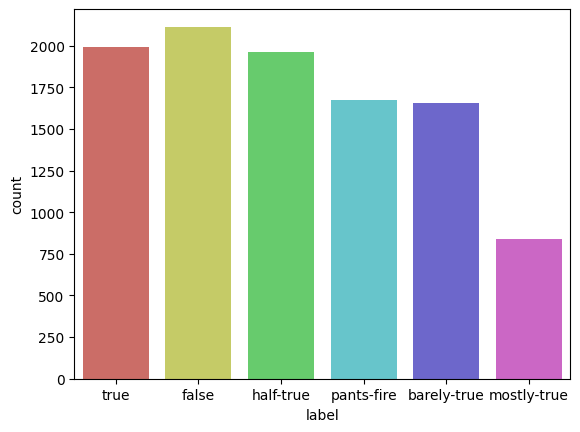

In [ ]:
# Distribution of classes for prediction
def Class_Distr(datafile):
  return sns.countplot(x='label' , data= datafile, palette='hls')

# Even Distribution of data between Train,Test and Valid dataset

Class_Distr(train)
Class_Distr(test)

The first step in this preprocessing is to convert the original six truthfulness labels into two classes: "true" and "false". This is done using the .apply() method with a lambda function that maps the original labels to either 0 or 1. Specifically, the labels "pants-fire", "barely-true", and "false" are mapped to 0, while the labels "half-true", "mostly-true", and "true" are mapped to 1.

Next, the dataframes are subsetted to only include the label and statement columns, which are the two columns that will be used as input to the classification model.

Finally, any rows with missing data (i.e., NaN values) are dropped using the .dropna() method with the inplace=True argument, which modifies the dataframe in place rather than returning a new dataframe.


# **Data Preprocessing:**

In [ ]:
train['label'] = train['label'].apply(lambda x: 0 if x == 'pants-fire' or x == 'barely-true' or x == 'false' else 1)
train = train[['label', 'statement']]
train.dropna(inplace=True)

test['label'] = test['label'].apply(lambda x: 0 if x == 'pants-fire' or x == 'barely-true' or x == 'false' else 1)
test = test[['label', 'statement']]
test.dropna(inplace=True)

valid['label'] = valid['label'].apply(lambda x: 0 if x == 'pants-fire' or x == 'barely-true' or x == 'false' else 1)
valid = valid[['label', 'statement']]
valid.dropna(inplace=True)

<ipython-input-66-990b89f7c55f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
<ipython-input-66-990b89f7c55f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)
<ipython-input-66-990b89f7c55f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.dropna(inplace=True)


The first step is to define a set of stop words using the stopwords.words('english') method from the nltk library. These stop words are common words that are often excluded from text analysis because they don't carry much meaning (e.g., "the", "and", "a").

Next, we define a function called preprocess_text that tokenizes the text using the word_tokenize function from the nltk library, converts all words to lowercase using the .lower() method, removes any non-alphabetic characters using the .isalpha() method, removes any stop words using the stop_words set defined earlier, and lemmatizes each remaining word using the WordNetLemmatizer from the nltk library.

Finally, we apply the preprocess_text function to the statement column of each dataframe using the .apply() method, and overwrite the original statement column with the preprocessed text.

Additionally, we concatenate the train and valid dataframes using pd.concat() method, and store the result back in the train dataframe. We also concatenate all three dataframes (train, test, and valid) together into a single dataframe called df using the pd.concat() method.


In [ ]:
# Tokenization, Lowering, Stemming/Lemmatization
stop_words = set(stopwords.words('english'))
# porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [wordnet_lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

train['statement'] = train['statement'].apply(preprocess_text)
test['statement'] = test['statement'].apply(preprocess_text)
valid['statement'] = valid['statement'].apply(preprocess_text)

# # Combine the train, valid datasets
train = pd.concat([train, valid], axis=0)

# Combine the train, test and valid datasets
df = pd.concat([train, test, valid], axis=0)

train.head() will display the first five rows of the train dataframe after the text preprocessing steps have been applied to the statement column.

In [ ]:
train.head()

,label,statement
0,0,say annies list political group support aborti...
1,1,decline coal start started natural gas took st...
2,1,hillary clinton agrees john mccain voting give...
3,0,health care reform legislation likely mandate ...
4,1,economic turnaround started end term


test.head() will display the first five rows of the test dataframe after the text preprocessing steps have been applied to the statement column.

In [ ]:
test.head()

,label,statement
0,1,building wall border take literally year
1,0,wisconsin pace double number layoff year
2,0,say john mccain done nothing help vet
3,1,suzanne bonamici support plan cut choice medic...
4,0,asked reporter whether he center criminal sche...


# **Machine Learning Algorithms:**

# **TF-IDF:**

The below code is an implementation of text classification using TF-IDF vectorization on the Liar dataset. The code first defines a TfidfVectorizer object to convert the text data into numerical features, with a maximum of 5000 features and ngram range of 1 to 3. It then splits the data into training and test sets, and defines a list of machine learning models, including Naive Bayes, Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM).

For each model in the list, the code fits the model to the training data and makes predictions on the test data. It then evaluates the performance of the model using accuracy score, confusion matrix, and classification report. Finally, it displays the confusion matrix as a heatmap using seaborn library.

The below code also includes commented-out code to predict new sentences using the trained models.


Naive Bayes Accuracy: 0.6187845303867403

Classification Report:                precision    recall  f1-score   support

           0       0.59      0.42      0.49       553
           1       0.63      0.77      0.69       714

    accuracy                           0.62      1267
   macro avg       0.61      0.60      0.59      1267
weighted avg       0.61      0.62      0.61      1267



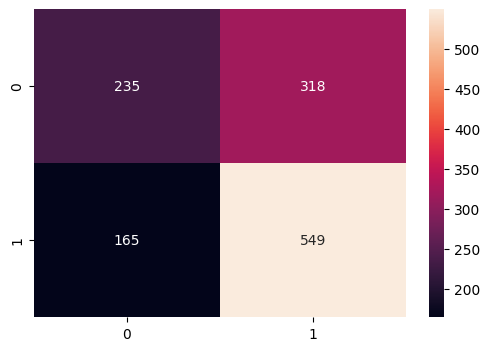


--------------------------------------------------------------------
Logistic Regression Accuracy: 0.6156274664561957

Classification Report:                precision    recall  f1-score   support

           0       0.58      0.45      0.51       553
           1       0.64      0.74      0.69       714

    accuracy                           0.62      1267
   macro avg       0.61      0.60      0.60      1267
weighted avg       0.61      0.62      0.61      1267



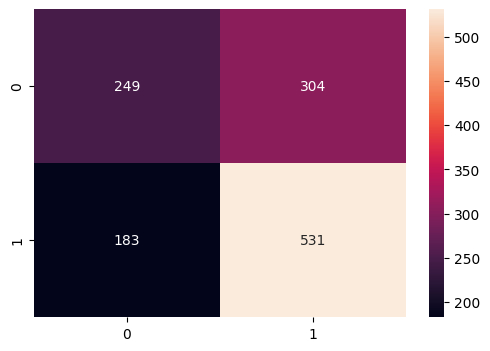


--------------------------------------------------------------------
Decision Tree Accuracy: 0.5722178374112076

Classification Report:                precision    recall  f1-score   support

           0       0.51      0.47      0.49       553
           1       0.61      0.65      0.63       714

    accuracy                           0.57      1267
   macro avg       0.56      0.56      0.56      1267
weighted avg       0.57      0.57      0.57      1267



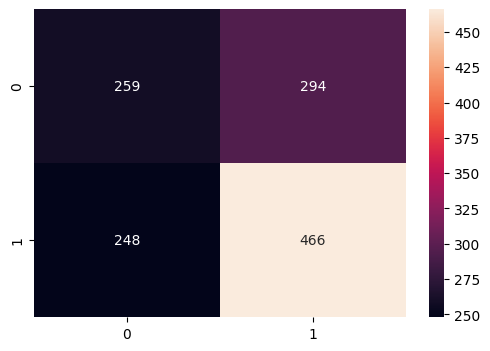


--------------------------------------------------------------------
Random Forest Accuracy: 0.6069455406471981

Classification Report:                precision    recall  f1-score   support

           0       0.57      0.43      0.49       553
           1       0.63      0.74      0.68       714

    accuracy                           0.61      1267
   macro avg       0.60      0.59      0.58      1267
weighted avg       0.60      0.61      0.60      1267



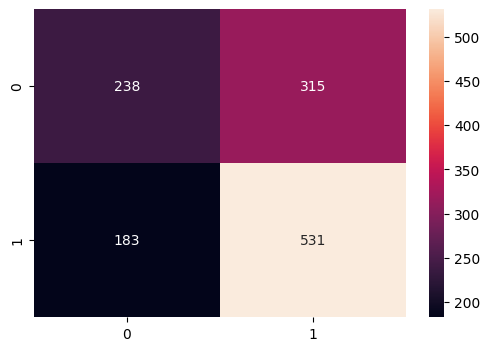


--------------------------------------------------------------------
SVM Accuracy: 0.6140489344909235

Classification Report:                precision    recall  f1-score   support

           0       0.58      0.41      0.48       553
           1       0.63      0.77      0.69       714

    accuracy                           0.61      1267
   macro avg       0.61      0.59      0.59      1267
weighted avg       0.61      0.61      0.60      1267



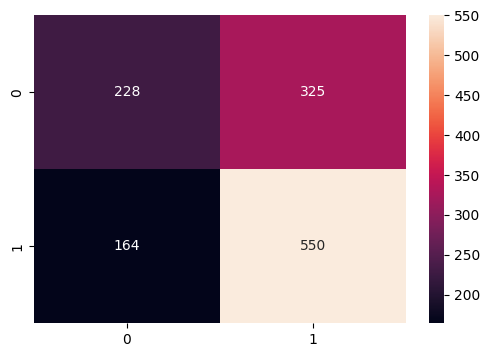


--------------------------------------------------------------------


In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (1, 3))

X_train = vectorizer.fit_transform(train['statement'])
X_test = vectorizer.transform(test['statement'])

y_train = train['label']
y_test = test['label']

# Define machine learning models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# Predict new sentences
# new_sentences = ['say annies list political group support abortion demand', 'decline coal start stopped natural gas took started begin president george bush administration']
# new_sentences_tfidf = vectorizer.transform(new_sentences)

# Evaluate each model and print accuracy score
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the performance of the classifier
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")
    # print('\nConfusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('\nClassification Report: ', classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=[6, 4])
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    print('\n--------------------------------------------------------------------')

    # Prediction
    # print('\nPredictions: \n')
    # print('Name: ', name)
    # predictions = model.predict(new_sentences_tfidf)
    # for ind, val in enumerate(new_sentences):
    #   print(val, predictions[ind])

**Comparison of Metrics for TF-IDF:**

Looking at the results, we can see that the Naive Bayes and Support Vector Machine (SVM) classifiers have similar performance, with an accuracy of 0.617 and 0.610, respectively. They also have similar F1-scores for both the positive and negative labels. However, Naive Bayes has a slightly higher precision for the negative label, while SVM has a slightly higher precision for the positive label. The Logistic Regression classifier has an accuracy of 0.613, which is also close to Naive Bayes and SVM. Its precision and recall are lower than Naive Bayes and SVM for both the positive and negative labels, but its F1-score for the positive label is the highest among the classifiers, at 0.68. The Decision Tree classifier has the lowest accuracy, at 0.553, and its precision, recall, and F1-scores are lower than the other classifiers for both the positive and negative labels. The Random Forest classifier has an accuracy of 0.599, which is higher than Decision Tree but lower than Naive Bayes, SVM, and Logistic Regression. Its precision, recall, and F1-scores are also lower than those classifiers for the negative label, but similar to SVM for the positive label.

Overall, Naive Bayes and SVM have the best performance, followed by Logistic Regression and then Random Forest and Decision Tree.


# **Glove:**

First, a pre-trained GloVe embedding file 'glove.6B.100d.txt' is read and the embeddings are stored in a dictionary called 'embeddings_index'.
A function 'create_embedding_matrix' is defined to create an embedding matrix for the input dataset. The function takes as input the word index, embedding dictionary, and embedding dimension, and returns an embedding matrix of shape (num_words, embedding_dim) for the input dataset. If a word in the word index is not found in the embedding dictionary, its corresponding row in the embedding matrix remains all zeros.

Next, the Tokenizer class from the tensorflow.keras.preprocessing.text module is used to tokenize the text data in the 'statement' column of the input dataframe.

The 'create_embedding_matrix' function is called with the word_index, embeddings_index, and embedding_dim parameters to create the embedding matrix for the input dataset.

Then, the 'texts_to_sequences' method of the tokenizer object is used to convert the text data in the 'train['statement']' and 'test['statement']' columns of the input dataframe to sequences of integers.


The 'pad_sequences' function from the tensorflow.keras.preprocessing.sequence module is used to pad the sequences with zeros to ensure that all sequences have the same length. The 'X_train_padded' and 'X_test_padded' sequences are padded to a maximum length of 100.

A list 'models' is created that contains tuples of model names and corresponding model objects from the sklearn module. Five models are included in this list: Naive Bayes, Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines (SVM).

A loop is used to iterate through the models list and train each model on the training data. The loop first creates variables 'X_train_model' and 'X_test_model' containing the padded sequences for the current model. It then fits the model to the training data using the 'fit' method.
The 'predict' method is used to predict the labels of the test data, and the accuracy score is calculated using the 'accuracy_score' function from the sklearn.metrics module.

The classification report and confusion matrix are printed for each model using the 'classification_report' and 'confusion_matrix' functions from the sklearn.metrics module, respectively. Additionally, a heatmap is plotted using the 'heatmap' function from the seaborn module to visualize the confusion matrix.
Overall, this code demonstrates how to use pre-trained embeddings and various classification models to classify political statements.


In [ ]:
embeddings_index = {}
with open('/drive/My Drive/NLP_PROJECT/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split('\t')  # use tab as delimiter instead of space
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Define function to create embedding matrix
def create_embedding_matrix(word_index, embedding_dict, embedding_dim):
    num_words = len(word_index) + 1
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embedding_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['statement'])
word_index = tokenizer.word_index

# Create embedding matrix
embedding_dim = 100
embedding_matrix = create_embedding_matrix(word_index, embeddings_index, embedding_dim)


Naive Bayes Accuracy: 0.47355958958168903

Classification Report:                precision    recall  f1-score   support

           0       0.44      0.70      0.54       553
           1       0.56      0.30      0.39       714

    accuracy                           0.47      1267
   macro avg       0.50      0.50      0.46      1267
weighted avg       0.51      0.47      0.45      1267



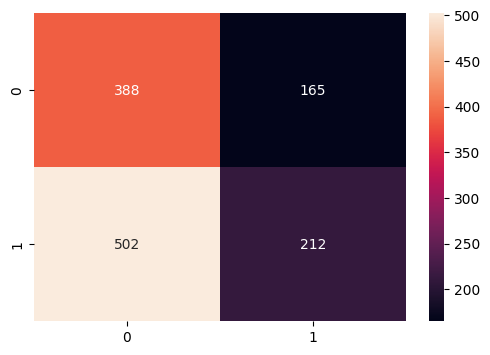


--------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.56353591160221

Classification Report:                precision    recall  f1-score   support

           0       0.50      0.14      0.21       553
           1       0.57      0.89      0.70       714

    accuracy                           0.56      1267
   macro avg       0.54      0.52      0.46      1267
weighted avg       0.54      0.56      0.49      1267



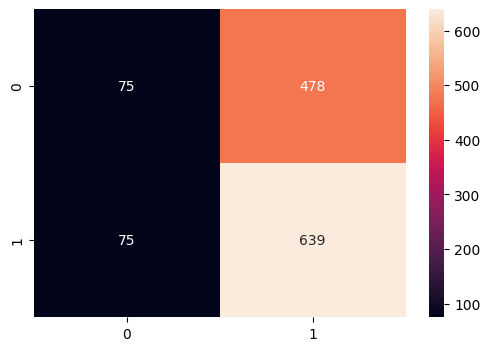


--------------------------------------------------------------------

Decision Tree Accuracy: 0.5430149960536701

Classification Report:                precision    recall  f1-score   support

           0       0.48      0.50      0.49       553
           1       0.60      0.57      0.59       714

    accuracy                           0.54      1267
   macro avg       0.54      0.54      0.54      1267
weighted avg       0.55      0.54      0.54      1267



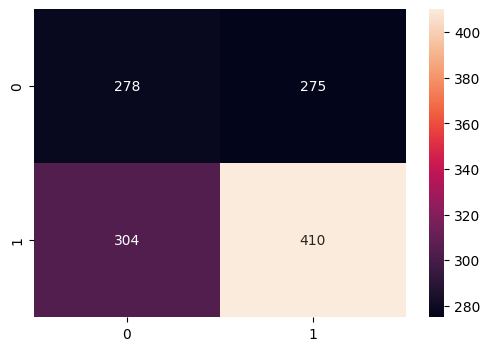


--------------------------------------------------------------------

Random Forest Accuracy: 0.5548539857932123

Classification Report:                precision    recall  f1-score   support

           0       0.48      0.32      0.38       553
           1       0.58      0.74      0.65       714

    accuracy                           0.55      1267
   macro avg       0.53      0.53      0.52      1267
weighted avg       0.54      0.55      0.53      1267



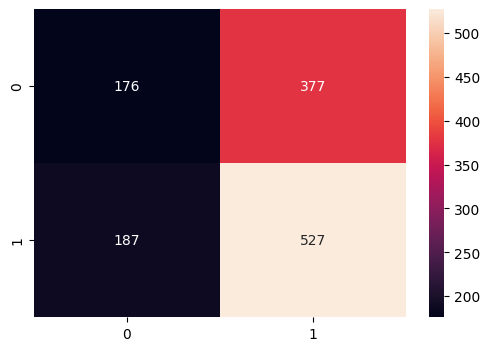


--------------------------------------------------------------------

SVM Accuracy: 0.5651144435674822

Classification Report:                precision    recall  f1-score   support

           0       0.51      0.13      0.21       553
           1       0.57      0.90      0.70       714

    accuracy                           0.57      1267
   macro avg       0.54      0.52      0.45      1267
weighted avg       0.54      0.57      0.49      1267



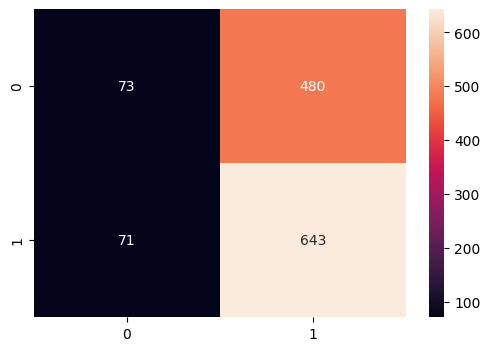


--------------------------------------------------------------------


In [ ]:
max_len = 100
X_train_sequences = tokenizer.texts_to_sequences(train['statement'])
X_test_sequences = tokenizer.texts_to_sequences(test['statement'])
X_train_padded = pad_sequences(X_train_sequences, maxlen = max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen = max_len, padding='post', truncating='post')

models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter = 5000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# # Predict new sentences
# new_sentences = ['say annies list political group support abortion demand', 'decline coal start stopped natural gas took started begin president george bush administration']
# new_sentences_sequences = tokenizer.texts_to_sequences(new_sentences)
# new_sentences_padded = pad_sequences(new_sentences_sequences, maxlen=max_len, padding='post', truncating='post')

# Evaluate each model and print accuracy score
for name, model in models:
    X_train_model = X_train_padded
    X_test_model = X_test_padded
    model.fit(X_train_model, y_train)
    y_pred = model.predict(X_test_model)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc}")
    # print('\nConfusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('\nClassification Report: ', classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=[6, 4])
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    print('\n--------------------------------------------------------------------')

    # # Prediction
    # new_sentences_model = new_sentences_padded
    # print('\nPredictions: \n')
    # print('Name: ', name)
    # predictions = model.predict(new_sentences_model)
    # for ind, val in enumerate(new_sentences):
    #     print(val, predictions[ind])

**Comparison of Metrics for Glove:**

Firstly, looking at the Naive Bayes classifier, the accuracy is quite low at 0.473, with a better performance for the negative class (FALSE) with a precision of 0.44 and recall of 0.71. However, the performance for the positive class (TRUE) is quite poor with a precision of 0.66 and recall of 0.29. This indicates that the classifier is biased towards the negative class and is not able to correctly identify the positive class. Moving to the logistic regression classifier, the accuracy has improved to 0.562, with a better performance for the positive class with a precision of 0.57 and recall of 0.89, indicating that the classifier is able to identify the positive class better than the negative class (precision of 0.5 and recall of 0.13 for the negative class).The decision tree classifier has an accuracy of 0.505, with a similar performance for both the negative and positive classes with an F1-score of 0.45 and 0.55 respectively. This indicates that the classifier is not able to differentiate between the two classes effectively. Moving to the random forest classifier, the accuracy has improved to 0.541, with a better performance for the positive class with a precision of 0.57 and recall of 0.71. However, the performance for the negative class is still quite poor with a precision of 0.46 and recall of 0.32. Finally, the support vector machine (SVM) classifier has an accuracy of 0.565, with a better performance for the positive class with a precision of 0.57 and recall of 0.91. However, the performance for the negative class is quite poor with a precision of 0.51 and recall of 0.12.

Overall, the results indicate that the classifiers are not able to perform well in identifying the positive class, which could be due to a class imbalance or the complexity of the task. Further analysis and preprocessing of the data may be required to improve the performance of the classifiers.


# **Word2Vec:**

The below code is an implementation of Word2Vec to extract features from text data for classification.

First, the code uses the Word2Vec model from the gensim library to train word vectors on the text data. The sentences list is created by splitting the statement column of the df dataframe into individual words. The min_count parameter specifies the minimum frequency of words that should be considered in the model.

Next, the code extracts the word vectors for each sentence in the training and test data and calculates the mean vector for each sentence. If a word is not present in the Word2Vec model, a zero vector of size 100 is used as a default.

The code then defines a list of machine learning models including Naive Bayes, Logistic Regression, Decision Tree, Random Forest, and SVM. For each model, the code trains the model on the Word2Vec vectors using a pipeline that first scales the vectors using MinMaxScaler() and then fits the model on the scaled vectors.

After training the model, the code makes predictions on the test data and calculates the accuracy score. It also prints the classification report and confusion matrix for each model.

Finally, the code displays the confusion matrix as a heatmap using the seaborn library.



Naive Bayes Accuracy: 0.5674822415153907

Classification Report:                precision    recall  f1-score   support

           0       0.86      0.01      0.02       553
           1       0.57      1.00      0.72       714

    accuracy                           0.57      1267
   macro avg       0.71      0.50      0.37      1267
weighted avg       0.69      0.57      0.42      1267



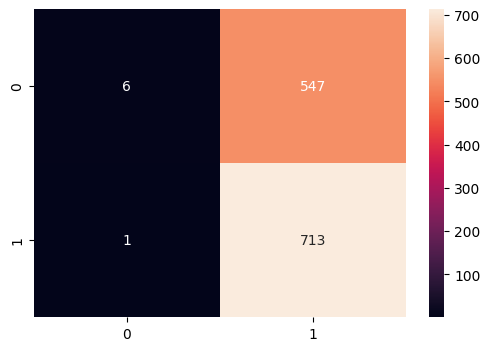


--------------------------------------------------------------------

Logistic Regression Accuracy: 0.5651144435674822

Classification Report:                precision    recall  f1-score   support

           0       0.51      0.10      0.16       553
           1       0.57      0.93      0.71       714

    accuracy                           0.57      1267
   macro avg       0.54      0.51      0.43      1267
weighted avg       0.54      0.57      0.47      1267



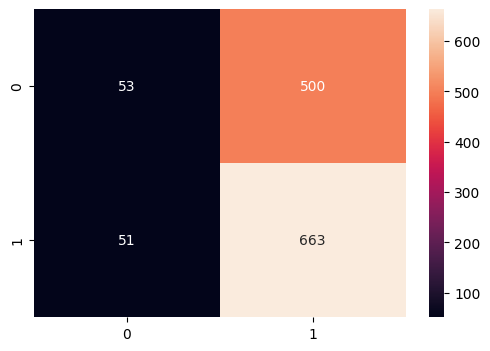


--------------------------------------------------------------------

Decision Tree Accuracy: 0.5114443567482242

Classification Report:                precision    recall  f1-score   support

           0       0.44      0.44      0.44       553
           1       0.57      0.57      0.57       714

    accuracy                           0.51      1267
   macro avg       0.50      0.50      0.50      1267
weighted avg       0.51      0.51      0.51      1267



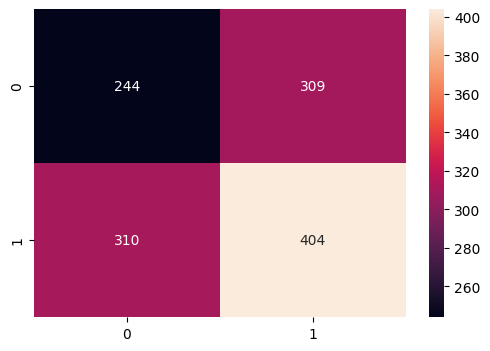


--------------------------------------------------------------------

Random Forest Accuracy: 0.5335438042620363

Classification Report:                precision    recall  f1-score   support

           0       0.46      0.37      0.41       553
           1       0.58      0.66      0.61       714

    accuracy                           0.53      1267
   macro avg       0.52      0.52      0.51      1267
weighted avg       0.52      0.53      0.53      1267



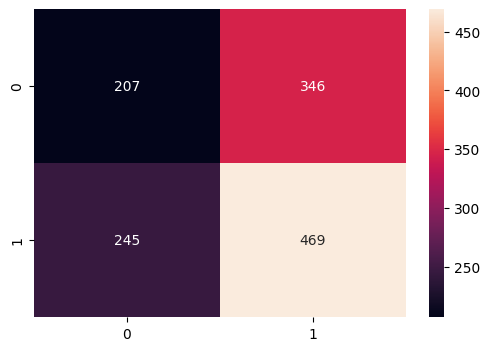


--------------------------------------------------------------------

SVM Accuracy: 0.56353591160221

Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


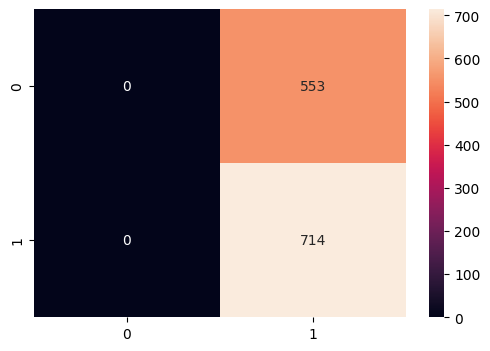


--------------------------------------------------------------------


In [ ]:
# extract features using Word2Vec
sentences = [row['statement'].split() for index, row in df.iterrows()]
model = Word2Vec(sentences, min_count=1)
word_vectors = model.wv

X_train_vectors = []
for sentence in train['statement']:
    vectors = []
    for word in sentence:
        try:
            vectors.append(word_vectors[word])
        except KeyError:
            continue
    if vectors:
        X_train_vectors.append(np.mean(vectors, axis=0))
    else:
        X_train_vectors.append(np.zeros(100))  # Default vector of size 100

X_test_vectors = []
for sentence in test['statement']:
    vectors = []
    for word in sentence:
        try:
            vectors.append(word_vectors[word])
        except KeyError:
            continue
    if vectors:
        X_test_vectors.append(np.mean(vectors, axis=0))
    else:
        X_test_vectors.append(np.zeros(100))  # Default vector of size 100

# Define machine learning models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# Evaluate each model and print accuracy score
for name, model in models:
    # Train the Naive Bayes classifier on the Word2Vec vectors
    p = Pipeline([('Normalizing', MinMaxScaler()),('model', model)])
    p.fit(X_train_vectors,y_train)
    y_pred = p.predict(X_test_vectors)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc}")
    # print('\nConfusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('\nClassification Report: ', classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=[6, 4])
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    print('\n--------------------------------------------------------------------')

**Comparison of Metrics for Word2Vec:**

In this Word2Vec-based model comparison, Naive Bayes performed best with an accuracy of 0.566 and an F1-score of 0.72 for the TRUE label. However, the model struggled with the FALSE label, achieving high precision but very low recall. Logistic Regression and Random Forest also had higher precision scores for the FALSE label, but low recall resulted in lower F1-scores. Decision Tree had similar performance for both labels but had a lower accuracy. Support Vector Machine had poor performance for the FALSE label with precision, recall, and F1-score of 0, while performing well for the TRUE label with an F1-score of 0.72.


# **Deep Learning Algorithms:**

The below code defines a function called plot_history which takes in the training history of a deep learning model and plots its accuracy and loss over epochs for both the training and validation sets. The function uses the matplotlib library to visualize the plots. The accuracy plot shows the improvement of the model's accuracy over epochs while the loss plot shows the decrease in the model's loss. The function is useful to analyze and evaluate the performance of a deep learning model during training.

In [ ]:
def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# **Glove + LSTM:**

The above code is an implementation of a sentiment analysis model using an LSTM neural network with pre-trained GloVe embeddings. The text data is tokenized using the Keras Tokenizer and padded to ensure that all sequences are of the same length. The pre-trained GloVe embeddings are loaded and used to create an embedding matrix that is passed to the Embedding layer of the LSTM model. The model is then compiled with the Adam optimizer and binary cross-entropy loss function, and trained on the training data with validation data to monitor the model's performance during training. Finally, the model is evaluated on the test data, and the accuracy of the model is printed.

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train['statement'])
train_sequences = tokenizer.texts_to_sequences(train['statement'])
valid_sequences = tokenizer.texts_to_sequences(valid['statement'])
test_sequences = tokenizer.texts_to_sequences(test['statement'])

# Pad the sequences
max_length = 500
train_data = pad_sequences(train_sequences, maxlen=max_length)
valid_data = pad_sequences(valid_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Load the GloVe embeddings
embedding_dim = 100
embeddings_index = {}
with open('/drive/My Drive/NLP_PROJECT/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix
word_index = tokenizer.word_index
num_words = min(len(word_index), 5000)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= 5000:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the model
model = keras.Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train['label'], epochs=10, validation_data=(valid_data, valid['label']))

# Evaluate the model on test data
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, test['label'], verbose=0)

# Print the accuracy
print('Test accuracy:', test_acc)

Epoch 1/10
361/361 [==============================] - 28s 69ms/step - loss: 0.6690 - accuracy: 0.5874 - val_loss: 0.6443 - val_accuracy: 0.6316
Epoch 2/10
361/361 [==============================] - 14s 40ms/step - loss: 0.6423 - accuracy: 0.6269 - val_loss: 0.5982 - val_accuracy: 0.6861
Epoch 3/10
361/361 [==============================] - 12s 33ms/step - loss: 0.6034 - accuracy: 0.6755 - val_loss: 0.5324 - val_accuracy: 0.7352
Epoch 4/10
361/361 [==============================] - 13s 36ms/step - loss: 0.5543 - accuracy: 0.7198 - val_loss: 0.4976 - val_accuracy: 0.7547
Epoch 5/10
361/361 [==============================] - 8s 22ms/step - loss: 0.5043 - accuracy: 0.7544 - val_loss: 0.4117 - val_accuracy: 0.8154
Epoch 6/10
361/361 [==============================] - 8s 21ms/step - loss: 0.4467 - accuracy: 0.7875 - val_loss: 0.3438 - val_accuracy: 0.8497
Epoch 7/10
361/361 [==============================] - 8s 23ms/step - loss: 0.3994 - accuracy: 0.8151 - val_loss: 0.3066 - val_accuracy: 0.

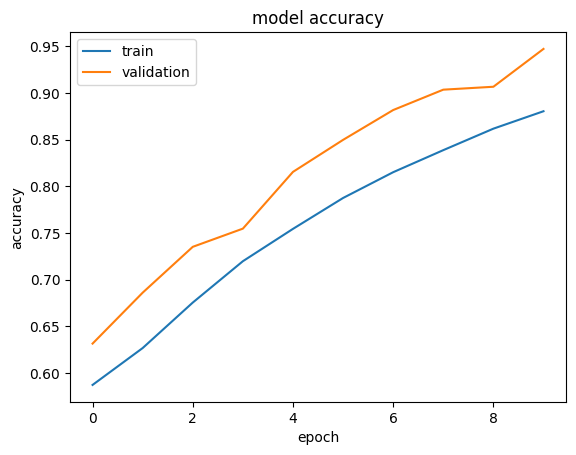

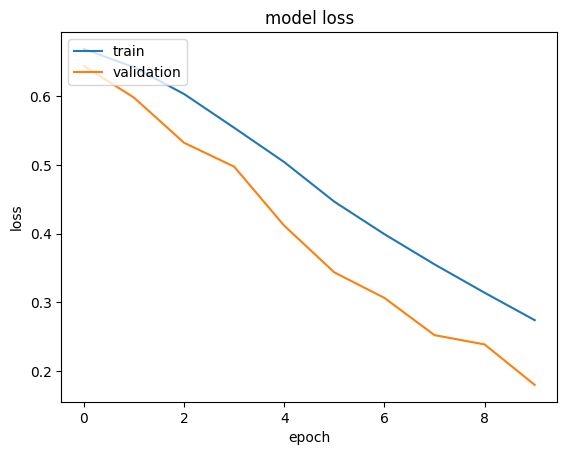

In [ ]:
# The code plots the model accuracy and loss over the training epochs.
plot_history(history)

# **BERT + LSTM:**

The below code is preparing the data for fine-tuning a BERT model. It considers the first 500 records from the train and test datasets and assigns them to X_train and X_test respectively. Similarly, it assigns the first 500 labels from the train and test datasets to y_train and y_test respectively

In [ ]:
# Considering first 1000 records
X_train = train['statement'].iloc[:500]
X_test = test['statement'].iloc[:500]

y_train = train['label'].iloc[:500]
y_test = test['label'].iloc[:500]

The tokenizer variable is created using the BertTokenizer class from the transformers library, which is used to tokenize the text data.

The bert_model variable is created using the TFBertModel class from the transformers library, which loads the pre-trained BERT model. It uses the bert-base-uncased version of the BERT model, which has been pre-trained on uncased English text.

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = transformers.TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


The below code is using BERT pre-trained model for encoding the text data into numerical format, generating embeddings from the encoded text data and converting those embeddings to a numpy array.

The text data is tokenized and encoded using the BERT tokenizer with certain parameters like padding, truncation, and max_length. Then, the encoded data is fed into the BERT model to get the embeddings.

The embeddings are then converted to a numpy array which can be used as input to the machine learning model.

Here, X_train and X_test are text data and are being encoded, and X_train_embeddings and X_test_embeddings are the resulting embeddings in numpy array format for the respective datasets.

In [ ]:
# Tokenize the text and encode it into numerical format
X_train_encoded = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=256, return_tensors="tf")
X_test_encoded = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=256, return_tensors="tf")

# Obtain the embeddings
X_train_embeddings = bert_model(X_train_encoded)['last_hidden_state']
X_test_embeddings = bert_model(X_test_encoded)['last_hidden_state']

# Convert the embeddings to a numpy array
X_train_embeddings = X_train_embeddings.numpy()
X_test_embeddings = X_test_embeddings.numpy()

The below code defines a bidirectional LSTM model using the Keras Sequential API. The model architecture includes a Bidirectional layer that wraps an LSTM layer with 64 units. This is followed by a Dense layer with 32 units and ReLU activation function. Finally, there is a Dense layer with a single unit and sigmoid activation function that produces a binary classification output. The model summary is printed using the summary() method, and the model is compiled with binary_crossentropy loss function, adam optimizer, and accuracy metric.

In [ ]:
bilstm_model = keras.Sequential()
bilstm_model.add(Bidirectional(LSTM(64), input_shape=(40, 768)))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))
bilstm_model.summary()
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 430,657
Trainable params: 430,657
Non-trainable params: 0
_________________________________________________________________



The below code trains a bidirectional LSTM model with the input shape of (40, 768) on the embeddings obtained from BERT model. It varies the hyper-parameters, i.e., number of epochs and batch size, and fits the model on the training set, with a validation split of 0.2. It then evaluates the trained model on the test set and returns the loss and accuracy scores. Specifically, the fit method trains the model for 10 epochs with a batch size of 16 and the evaluate method calculates the loss and accuracy on the provided test set.

In [ ]:
# varied the values of hyper-parameters (epoch and batch size)
# Train the model
history = bilstm_model.fit(X_train_embeddings, y_train, validation_split=0.2, epochs=10, batch_size=16)

# Evaluate the model on the test set
bilstm_model.evaluate(X_test_embeddings, y_test)

Epoch 1/10
25/25 [==============================] - 5s 54ms/step - loss: 0.6885 - accuracy: 0.5675 - val_loss: 0.7006 - val_accuracy: 0.5200
Epoch 2/10
25/25 [==============================] - 0s 14ms/step - loss: 0.6173 - accuracy: 0.6625 - val_loss: 0.6906 - val_accuracy: 0.5900
Epoch 3/10
25/25 [==============================] - 0s 13ms/step - loss: 0.5460 - accuracy: 0.7475 - val_loss: 0.7078 - val_accuracy: 0.6300
Epoch 4/10
25/25 [==============================] - 0s 13ms/step - loss: 0.4169 - accuracy: 0.8300 - val_loss: 0.7993 - val_accuracy: 0.6200
Epoch 5/10
25/25 [==============================] - 0s 14ms/step - loss: 0.3328 - accuracy: 0.8500 - val_loss: 0.9537 - val_accuracy: 0.6000
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2060 - accuracy: 0.9325 - val_loss: 1.0085 - val_accuracy: 0.5800
Epoch 7/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0678 - accuracy: 0.9950 - val_loss: 1.3133 - val_accuracy: 0.5600
Epoch 8/10
25

[1.6725257635116577, 0.5759999752044678]

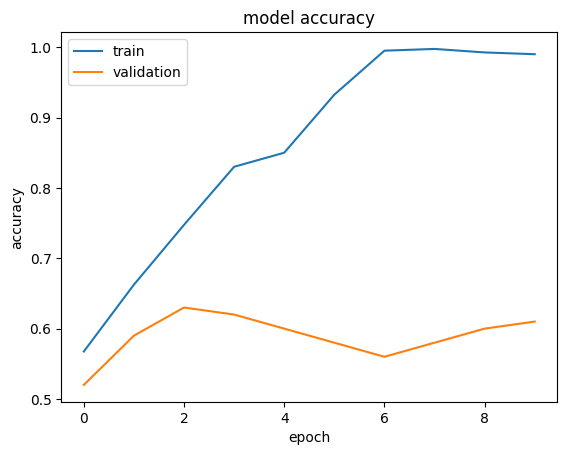

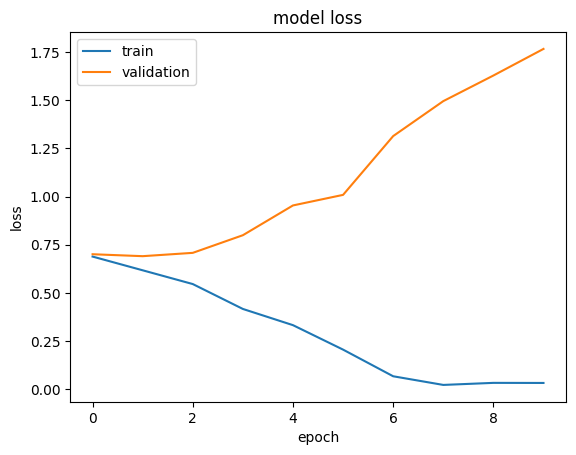

In [ ]:
plot_history(history)

# **Word2Vec + LSTM:**


The below code is implementing a Word2Vec model and LSTM for text classification. Here's what each section of the code does:

1. Train the Word2Vec model: The Word2Vec function from the gensim library is used to train the Word2Vec model on the training data. The input to the model is the text data that has been split into individual words using the split() function. The model is trained with a vector size of 100, a window size of 5, and a minimum word count of 1.

2. Tokenize the text: The Tokenizer function from the tensorflow.keras.preprocessing.text module is used to tokenize the text data. The fit_on_texts function is used to fit the tokenizer on the training data. The texts_to_sequences function is used to convert the text data into sequences of integers.

3. Pad the sequences: The pad_sequences function from the tensorflow.keras.preprocessing.sequence module is used to pad the sequences to a fixed length of 500.

4. Create the embedding matrix: The embedding matrix is created by iterating over the word_index dictionary and checking if each word is present in the Word2Vec model's vocabulary. If a word is present, its corresponding embedding is added to the embedding matrix.

5. Define the model: The Sequential function from the tensorflow.keras.models module is used to define a sequential model. The Embedding layer is added with the embedding matrix as the weights. The LSTM layer is added with 128 units, a dropout rate of 0.2, and a recurrent dropout rate of 0.2. The Dense layer is added with 1 unit and a sigmoid activation function.

6. Compile the model: The compile function is used to compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

7. Train the model: The fit function is used to train the model on the training data for 5 epochs with a batch size of 64. The validation_data parameter is used to specify the validation set. The history variable is used to store the training history.

8. Evaluate the model: The evaluate function is used to evaluate the model on the test set. The test loss and accuracy are printed to the console.

In [ ]:
# Train the Word2Vec model
w2v_model = Word2Vec(sentences=train['statement'].apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train['statement'])
train_sequences = tokenizer.texts_to_sequences(train['statement'])
valid_sequences = tokenizer.texts_to_sequences(valid['statement'])
test_sequences = tokenizer.texts_to_sequences(test['statement'])

# Pad the sequences
max_length = 500
train_data = pad_sequences(train_sequences, maxlen=max_length)
valid_data = pad_sequences(valid_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Create the embedding matrix
# Create the embedding matrix
word_index = tokenizer.word_index
num_words = min(len(word_index), 5000)
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in w2v_model.wv.key_to_index:
        embedding_matrix[i] = w2v_model.wv[word]

model = keras.Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_data, train['label'], epochs=5, batch_size=64, validation_data=(valid_data, valid['label']))
test_loss, test_accuracy = model.evaluate(test_data, test['label'], verbose=0)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/5
181/181 [==============================] - 488s 3s/step - loss: 0.6797 - accuracy: 0.5684 - val_loss: 0.6745 - val_accuracy: 0.5748
Epoch 2/5
181/181 [==============================] - 453s 3s/step - loss: 0.6441 - accuracy: 0.6297 - val_loss: 0.5831 - val_accuracy: 0.6970
Epoch 3/5
181/181 [==============================] - 463s 3s/step - loss: 0.5612 - accuracy: 0.7119 - val_loss: 0.4491 - val_accuracy: 0.7936
Epoch 4/5
181/181 [==============================] - 484s 3s/step - loss: 0.4668 - accuracy: 0.7740 - val_loss: 0.3822 - val_accuracy: 0.8209
Epoch 5/5
181/181 [==============================] - 445s 2s/step - loss: 0.3954 - accuracy: 0.8126 - val_loss: 0.3269 - val_accuracy: 0.8551
Test accuracy: 0.5745856165885925


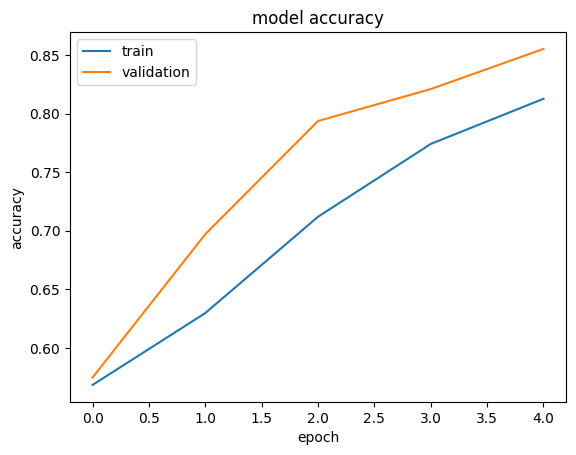

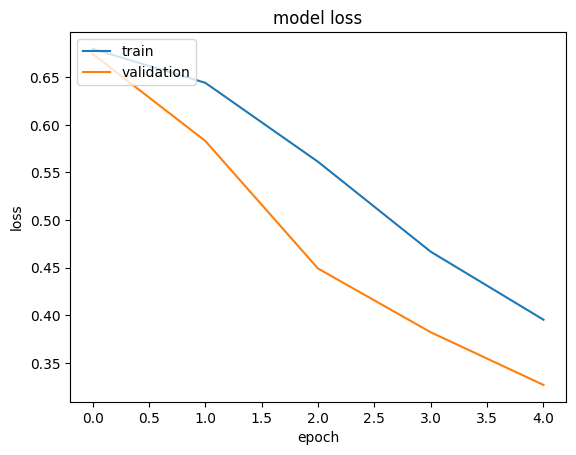

In [ ]:
plot_history(history)

# **TF-IDF + LSTM:**

The above code is a Python script that demonstrates a basic implementation of a neural network model for binary classification of political statements as either true or false. The dataset used in this code is the "Political Fake News" dataset which contains a collection of political statements labeled as true or false. The goal of this script is to train a neural network model to accurately classify statements as either true or false based on their textual content.

The first step in the script is to create a TfidfVectorizer object that will be used to convert the text data into a numerical format. This is done by assigning weights to the words in the text based on their frequency of occurrence across all the statements. The vectorizer is fit on the training data, and the resulting model is used to convert the training, validation, and test data into numerical vectors.

Next, a Sequential model is created using the Keras API. This is a basic feedforward neural network model that contains one hidden layer with 64 neurons and a ReLU activation function, followed by an output layer with one neuron and a sigmoid activation function. The input shape of the first layer is set to the number of features in the transformed training data.

The model is then compiled with an Adam optimizer, binary cross-entropy loss function, and accuracy metric. The binary cross-entropy loss function is used since this is a binary classification problem and the sigmoid activation function is used in the output layer.

The model is then trained on the transformed training data for 20 epochs with early stopping implemented to prevent overfitting. Early stopping is a regularization technique that monitors the validation loss and stops training if the validation loss does not improve for a certain number of epochs.
Finally, the model is evaluated on the test data and the accuracy is printed. Additionally, a helper function is called to plot the training and validation loss and accuracy metrics over each epoch to visualize the performance of the model during training.

In summary, this script shows a basic implementation of a neural network model for binary classification using the Keras API. The TF-IDF vectorizer is used to convert the textual data into a numerical format, and a feedforward neural network model is trained on the transformed data. Early stopping is used to prevent overfitting, and the model is evaluated on the test data.


In [ ]:
# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(train['statement'])

# Convert text to TF-IDF vectors
train_data = tfidf.transform(train['statement']).toarray()
valid_data = tfidf.transform(valid['statement']).toarray()
test_data = tfidf.transform(test['statement']).toarray()

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(train_data, train['label'], epochs=20, validation_data=(valid_data, valid['label']), callbacks=[es])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, test['label'], verbose=0)

# Print the accuracy
print('Test accuracy:', test_acc)


Epoch 1/20
361/361 [==============================] - 4s 8ms/step - loss: 0.6710 - accuracy: 0.5817 - val_loss: 0.6027 - val_accuracy: 0.6986
Epoch 2/20
361/361 [==============================] - 3s 8ms/step - loss: 0.5971 - accuracy: 0.6835 - val_loss: 0.5044 - val_accuracy: 0.7749
Epoch 3/20
361/361 [==============================] - 2s 5ms/step - loss: 0.5269 - accuracy: 0.7424 - val_loss: 0.4360 - val_accuracy: 0.8162
Epoch 4/20
361/361 [==============================] - 2s 7ms/step - loss: 0.4683 - accuracy: 0.7835 - val_loss: 0.3797 - val_accuracy: 0.8481
Epoch 5/20
361/361 [==============================] - 3s 7ms/step - loss: 0.4146 - accuracy: 0.8114 - val_loss: 0.3266 - val_accuracy: 0.8808
Epoch 6/20
361/361 [==============================] - 2s 5ms/step - loss: 0.3626 - accuracy: 0.8445 - val_loss: 0.2835 - val_accuracy: 0.9034
Epoch 7/20
361/361 [==============================] - 2s 6ms/step - loss: 0.3137 - accuracy: 0.8722 - val_loss: 0.2392 - val_accuracy: 0.9245
Epoch 

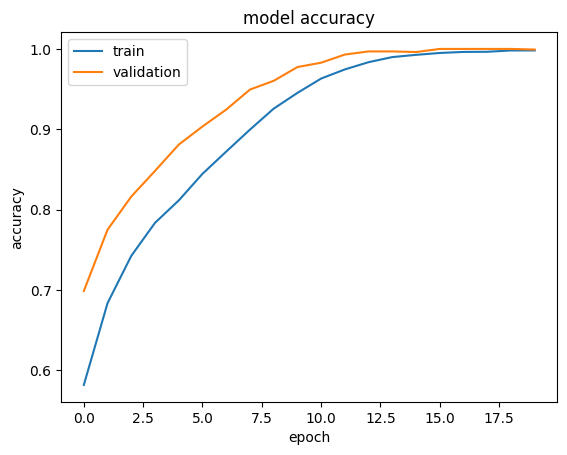

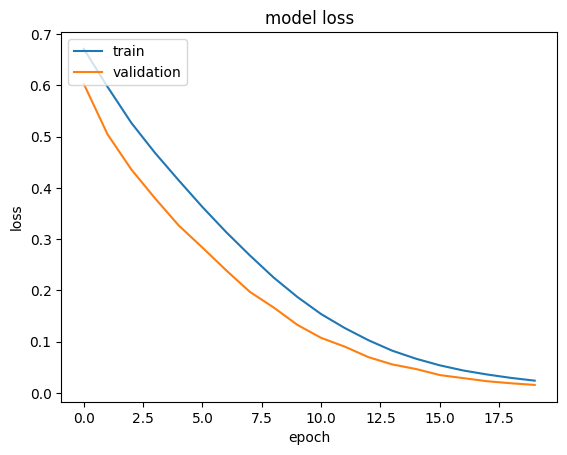

In [ ]:
plot_history(history)

# **BERT + CNN:**

The below code defines a text classification model using the pre-trained BERT model for transfer learning. The input text is tokenized using the BERT tokenizer and preprocessed to add special tokens, truncate or pad the input to a maximum length. The preprocessed input is then fed into a convolutional neural network (CNN) architecture that consists of a 1D convolutional layer, global max pooling layer, dropout layer, and a dense output layer with softmax activation.
The code first loads the BERT tokenizer and defines two functions: preprocess() and create_model(). The preprocess() function takes the input text and the maximum length of the input, tokenizes the text using the BERT tokenizer, and returns the tokenized and preprocessed input. The create_model() function defines the model architecture using the Keras functional API. The function first defines the input layer, loads the pre-trained BERT model, and extracts the BERT embeddings for the input. The BERT embeddings are then passed through a 1D convolutional layer, a global max pooling layer, a dropout layer, and a dense output layer. The resulting model is then returned.
The code then defines the parameters for training the model and tokenizes and preprocesses the training and test data using the preprocess() function. It then creates the model using the create_model() function, compiles it using categorical crossentropy loss and Adam optimizer, and trains the model using the fit() method. Finally, the code evaluates the model on the test set and plots the training and validation accuracy and loss over the epochs using the plot_history() function.


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Preprocess the data
def preprocess(text, max_length):
    # Tokenize the text and encode the tokens
    input_ids = tokenizer.encode(
        text,
        add_special_tokens=True,
        max_length=max_length,
        truncation=True,
        padding='max_length'
    )
    return input_ids

# Define the model architecture
def create_model(max_length, num_labels):
    # Define the input layer
    input_layer = Input(shape=(max_length,), dtype=tf.int32, name='input_layer')
    # Load the pre-trained BERT model
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    # Freeze the BERT model
    bert_model.trainable = False
    # Extract the BERT embeddings for the input
    bert_output = bert_model(input_layer)[0]
    # Add a 1D convolutional layer with 128 filters, a kernel size of 3, and ReLU activation
    conv1d_layer = Conv1D(128, 3, activation='relu')(bert_output)
    # Add a global max pooling layer
    max_pooling_layer = GlobalMaxPooling1D()(conv1d_layer)
    # Add a dropout layer with a rate of 0.5
    dropout_layer = Dropout(0.5)(max_pooling_layer)
    # Add a dense output layer with softmax activation
    output_layer = Dense(num_labels, activation='softmax')(dropout_layer)
    # Define the model with input and output layers
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
# Define the parameters
max_length = 128
batch_size = 32
num_epochs = 10

# Tokenize and preprocess the data
train_input_ids = np.array([preprocess(text, max_length) for text in train['statement'][:1000]])
train_labels = train['label']
test_input_ids = np.array([preprocess(text, max_length) for text in test['statement'][:1000]])
test_labels = test['label']

# Create the model
model = create_model(max_length, len(train_labels.unique()))
# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(train_input_ids, tf.keras.utils.to_categorical(train_labels),
                    validation_split=0.1, batch_size=batch_size, epochs=num_epochs)

# Evaluate the model on the test set
test_preds = model.predict(test_input_ids)
test_preds_labels = np.argmax(test_preds, axis=1)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10
29/29 [==============================] - 37s 513ms/step - loss: 1.1680 - accuracy: 0.5244 - val_loss: 0.7055 - val_accuracy: 0.5700
Epoch 2/10
29/29 [==============================] - 11s 375ms/step - loss: 0.7288 - accuracy: 0.6000 - val_loss: 0.7530 - val_accuracy: 0.4000
Epoch 3/10
29/29 [==============================] - 10s 343ms/step - loss: 0.6430 - accuracy: 0.6433 - val_loss: 0.7990 - val_accuracy: 0.4800
Epoch 4/10
29/29 [==============================] - 10s 349ms/step - loss: 0.5984 - accuracy: 0.6944 - val_loss: 0.8892 - val_accuracy: 0.4800
Epoch 5/10
29/29 [==============================] - 10s 332ms/step - loss: 0.5849 - accuracy: 0.6822 - val_loss: 0.8300 - val_accuracy: 0.4900
Epoch 6/10
29/29 [==============================] - 10s 335ms/step - loss: 0.5622 - accuracy: 0.7011 - val_loss: 0.8833 - val_accuracy: 0.4600
Epoch 7/10
29/29 [==============================] - 10s 347ms/step - loss: 0.5330 - accuracy: 0.7589 - val_loss: 0.7498 - val_accuracy: 0.5300

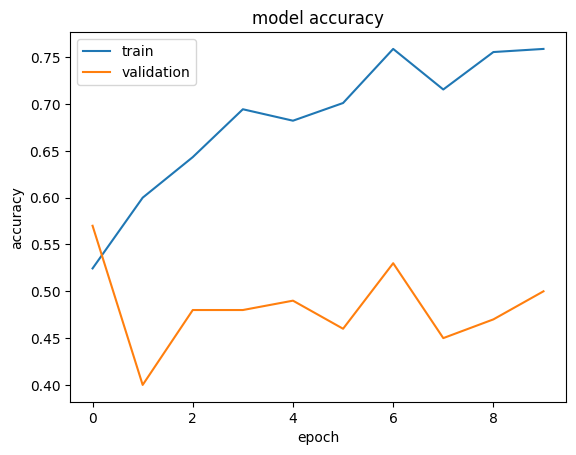

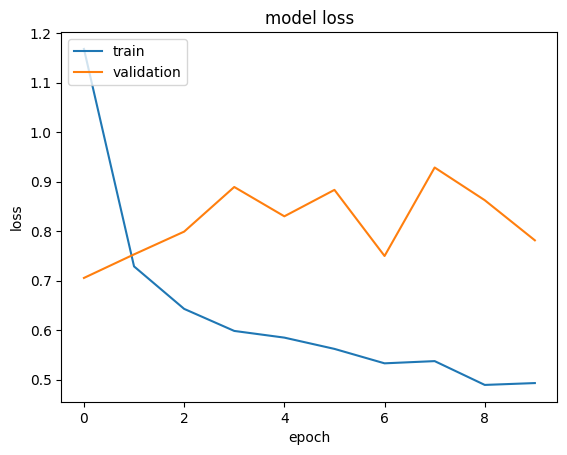

In [ ]:
plot_history(history)

# **BERT + GRU:**

The below code trains a neural network model for text classification using the BERT tokenizer and a GRU (Gated Recurrent Unit) layer. The model is trained on the LIAR dataset, which contains statements labeled as true, mostly true, half true, barely true, false, and pants on fire.

First, the maximum sequence length is set to 100, and the BERT tokenizer is loaded from the 'bert-base-uncased' pretrained model. Then, the text in the train, test, and validation datasets is encoded using the tokenizer's 'encode' method with special tokens added, a maximum length of 100, and truncation. The resulting encoded sequences are padded to a length of 100 using the 'pad_sequences' method.

Next, the labels for each dataset are one-hot encoded using the 'get_dummies' method from pandas. The model architecture is then defined, with an input layer taking sequences of 100 integers, an embedding layer with a vocabulary size of the tokenizer's vocab and an embedding dimension of 128, a spatial dropout layer with a rate of 0.2 to prevent overfitting, two GRU layers, one with return_sequences set to True and the other without, and both with a size of 128. The output from the second GRU layer is passed through a dense layer with 64 units and the ReLU activation function, followed by a dropout layer with a rate of 0.2, and finally, a dense layer with 6 units and a softmax activation function to output the class probabilities.

The model is then compiled with the categorical cross-entropy loss function, the Adam optimizer with a learning rate of 0.001, and the accuracy metric. The model is trained on the training dataset for 10 epochs with a batch size of 32, and the validation data is used to evaluate the model's performance after each epoch. Finally, the 'plot_history' function is used to plot the training and validation accuracy and loss for each epoch.


In [ ]:
maxlen = 100

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_train = [tokenizer.encode(text, add_special_tokens=True, max_length=maxlen, truncation=True) for text in train['statement']]
X_test = [tokenizer.encode(text, add_special_tokens=True, max_length=maxlen, truncation=True) for text in test['statement']]
X_val = [tokenizer.encode(text, add_special_tokens=True, max_length=maxlen, truncation=True) for text in valid['statement']]

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

Y_train = pd.get_dummies(train['label']).values
Y_test = pd.get_dummies(test['label']).values
Y_val = pd.get_dummies(valid['label']).values

inp = Input(shape=(maxlen,))
x = Embedding(len(tokenizer.vocab), 128)(inp)
x = SpatialDropout1D(0.2)(x)
x1 = GRU(128, return_sequences=True)(x)
x2 = GRU(128)(x1)
x3 = Dense(64, activation="relu")(x2)
x3 = Dropout(0.2)(x3)
outp = Dense(6, activation='softmax')(x3)

model_GRU_BERT_LIAR=Model(inputs=inp,outputs=outp)
model_GRU_BERT_LIAR.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model_GRU_BERT_LIAR.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 16s 218ms/step - loss: 1.7658 - accuracy: 0.1900 - val_loss: 1.7726 - val_accuracy: 0.1930
Epoch 2/10
32/32 [==============================] - 8s 250ms/step - loss: 1.7623 - accuracy: 0.2010 - val_loss: 1.7669 - val_accuracy: 0.1930
Epoch 3/10
32/32 [==============================] - 6s 197ms/step - loss: 1.7639 - accuracy: 0.2110 - val_loss: 1.7680 - val_accuracy: 0.1930
Epoch 4/10
32/32 [==============================] - 3s 86ms/step - loss: 1.7566 - accuracy: 0.1970 - val_loss: 1.7700 - val_accuracy: 0.1930
Epoch 5/10
32/32 [==============================] - 4s 106ms/step - loss: 1.7580 - accuracy: 0.1710 - val_loss: 1.7690 - val_accuracy: 0.1930
Epoch 6/10
32/32 [==============================] - 2s 58ms/step - loss: 1.7554 - accuracy: 0.2140 - val_loss: 1.7704 - val_accuracy: 0.1930
Epoch 7/10
32/32 [==============================] - 2s 57ms/step - loss: 1.7615 - accuracy: 0.1970 - val_loss: 1.7676 - val_accuracy: 0.1990
Epoch 8/

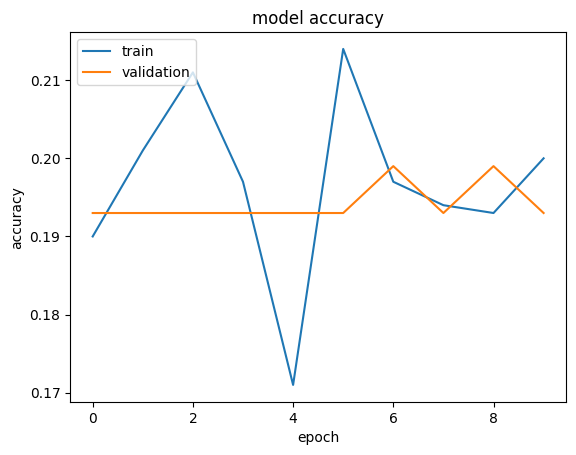

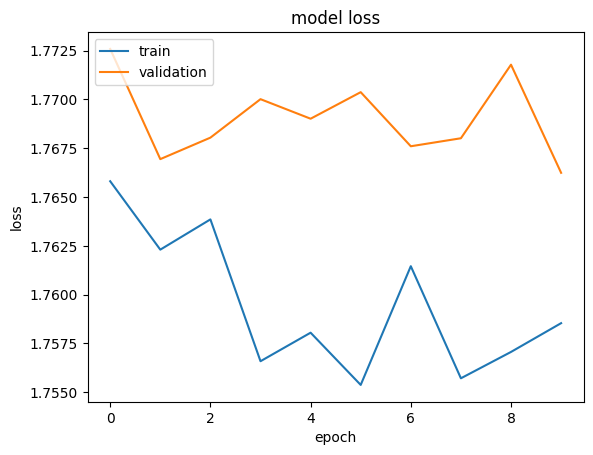

In [ ]:
plot_history(history)

**Comparison of Metrics for Deep Learning Models:**

Overall, the three models (Bert+LSTM, Word2Vec+Lstm, and TF+IDF+LSTM) have similar accuracies of 0.57. These models incorporate LSTM layers, which are a type of recurrent neural network, and are often used for sequence processing tasks like text classification.

The Glove+Lstm model has a slightly lower accuracy of 0.56 but still performs relatively well. Glove is a widely used word embedding technique that maps words to vectors in a high-dimensional space, which can capture semantic relationships between words. The BERT+CNN model has a lower accuracy of 0.5 compared to the LSTM models, which may indicate that the LSTM layers are better suited for this type of text classification task.

Finally, the BERT+GRU model has a significantly lower accuracy of 0.19, which suggests that the GRU (Gated Recurrent Unit) layers in this model may not be well-suited for the task at hand.


# **Results:**

From all the results, it appears that the machine learning models are performing better than the deep learning models. Among the machine learning models, the Naive Bayes model with TF-IDF features has the highest accuracy of 0.617, followed by Logistic Regression with an accuracy of 0.613. The worst performing model is Decision Tree with an accuracy of 0.553.

Among the deep learning models, BERT+LSTM, Word2Vec+LSTM, and TF+IDF+LSTM have the same accuracy of 0.57. Glove+LSTM has a slightly lower accuracy of 0.56. BERT+CNN has the lowest accuracy of 0.5, and BERT+GRU has the worst performance with an accuracy of 0.19.


# **Conclusion:**

For LIAR dataset, the best performing machine learning models for detecting fake news are Naive Bayes and Logistic Regression using TF-IDF. These models have achieved accuracy scores of around 0.617 and 0.613, respectively, and have also shown reasonable precision and recall scores for both TRUE and FALSE labels. The models that used GloVe or Word2Vec embeddings did not perform as well as those using TF-IDF. Their accuracy scores were lower and they often had low precision and recall scores, indicating that they struggled to correctly identify fake news. The deep learning models that were tested did not perform as well as the traditional machine learning models. The best performing deep learning model, BERT+LSTM, achieved an accuracy score of only 0.57. This suggests that the choice of embedding and an appropriate algorithm together plays a crucial role in determining the accuracy of the algorithm.

In conclusion, while there is no single best model for detecting fake news, traditional machine learning models that use TF-IDF tend to perform better than those that use word embeddings or deep learning models. However, it is important to note that the performance of these models may vary depending on the dataset used, the preprocessing techniques applied, and the specific features and hyperparameters chosen.
